## Final Project Submission


* Student name: Miriam Semmar
* Student pace: online part time
* Scheduled project review date/time: TBD
* Instructor name: James Irving
* Blog post URL: https://miriamsemmar.github.io/the_movie_database_api


# Ask

>Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. 

>Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. 

>You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

We will be tackling the above ask by leveraging TMDB data and API.

# Exploring the Available Data

## Package Import

In [1]:
# importing all packages we intend to leverage

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

## Determining What Data is Available

In [2]:
#Importing files provided.

files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

## Organizing Files

In [3]:
#Isolating the primary key and creating a list of the other columns within each file. 

primary_keys = []
other_columns = []

for file in files:
    try:
        primary_keys.append(pd.read_csv(file).columns[0])
        other_columns.append(list(pd.read_csv(file).columns[1:]))
    except:
        primary_keys.append(pd.read_csv(file,sep='\t',encoding='latin1').columns[0])
        other_columns.append(list(pd.read_csv(file,sep='\t',encoding='latin1').columns[1:]))

In [4]:
#Then, using these lists to create a dataframe for easy reference.
#Creating a dictionary from the above lists

data = {'File':files,'Primary Key':primary_keys,'Other Columns':other_columns}

# Creating the dataframe and ensuring we can view all values in the "Other Columns"

files_df = pd.DataFrame(data).sort_values('File')
pd.set_option('display.max_colwidth',1000)
files_df.reset_index(drop=True,inplace=True)
files_df

,File,Primary Key,Other Columns
0,zippedData/bom.movie_gross.csv.gz,title,"[studio, domestic_gross, foreign_gross, year]"
1,zippedData/imdb.name.basics.csv.gz,nconst,"[primary_name, birth_year, death_year, primary_profession, known_for_titles]"
2,zippedData/imdb.title.akas.csv.gz,title_id,"[ordering, title, region, language, types, attributes, is_original_title]"
3,zippedData/imdb.title.basics.csv.gz,tconst,"[primary_title, original_title, start_year, runtime_minutes, genres]"
4,zippedData/imdb.title.crew.csv.gz,tconst,"[directors, writers]"
5,zippedData/imdb.title.principals.csv.gz,tconst,"[ordering, nconst, category, job, characters]"
6,zippedData/imdb.title.ratings.csv.gz,tconst,"[averagerating, numvotes]"
7,zippedData/rt.movie_info.tsv.gz,id,"[synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio]"
8,zippedData/rt.reviews.tsv.gz,id,"[review, rating, fresh, critic, top_critic, publisher, date]"
9,zippedData/tmdb.movies.csv.gz,Unnamed: 0,"[genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]"


## File Summary


In [5]:
files_df

,File,Primary Key,Other Columns
0,zippedData/bom.movie_gross.csv.gz,title,"[studio, domestic_gross, foreign_gross, year]"
1,zippedData/imdb.name.basics.csv.gz,nconst,"[primary_name, birth_year, death_year, primary_profession, known_for_titles]"
2,zippedData/imdb.title.akas.csv.gz,title_id,"[ordering, title, region, language, types, attributes, is_original_title]"
3,zippedData/imdb.title.basics.csv.gz,tconst,"[primary_title, original_title, start_year, runtime_minutes, genres]"
4,zippedData/imdb.title.crew.csv.gz,tconst,"[directors, writers]"
5,zippedData/imdb.title.principals.csv.gz,tconst,"[ordering, nconst, category, job, characters]"
6,zippedData/imdb.title.ratings.csv.gz,tconst,"[averagerating, numvotes]"
7,zippedData/rt.movie_info.tsv.gz,id,"[synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio]"
8,zippedData/rt.reviews.tsv.gz,id,"[review, rating, fresh, critic, top_critic, publisher, date]"
9,zippedData/tmdb.movies.csv.gz,Unnamed: 0,"[genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]"


Starting with the Movie Budgets table (File 10) as cost information is readily available and tied to movie titles. Financial insight will be crucial to making relevant business decisions.

Notes on other files (referencing index in files_df):

- File 0: Gross information but tied grouped by studios. Also missing budget information, so we can't calculate profit from this table alone.

- Files 1, 4 and 5: Not interested in individual employees information this early on.  

- Files 2 and 3: Helpful movie information but prefer to start looking at information tied to budgets.

- Files 6 and 8: Could be interesting to determine if there's a correlation with popularity and rating, but not a priority. 

- Files 7 and 9: Very helpful information but does not contain budget information or, in the case of File 7, title information. May merge this with File 10 at a later time. 

# Question 1: What is the state of profits in the movie industry?

## Formatting/Initial Inspection of Data

In [6]:
#Importing movie budgets table as a dataframe. 
#Converting money strings to integers, replacing dollar signs in all money columns.

Money = pd.read_csv(files[8])
Money['production_budget'] = Money['production_budget'].str.replace('$','').str.replace(',','').astype(int)
Money['domestic_gross'] = Money['domestic_gross'].str.replace('$','').str.replace(',','').astype(int)
Money['worldwide_gross'] = Money['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)
Money.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [7]:
#Adding profit column

Money['total_profit'] = Money['worldwide_gross'] - Money['production_budget']
Money.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [8]:
#Checking for any null values. None.

Money.isna().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
total_profit         False
dtype: bool

In [9]:
#Checking for any missing data

Money.loc[(Money['worldwide_gross'] == 0)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000
479,80,"Dec 13, 2017",Bright,90000000,0,0,-90000000
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,-90000000
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,-82000000
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,-75000000
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,-12000
5771,72,"May 19, 2015",Family Motocross,10000,0,0,-10000
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000


In [10]:
#Excluding movies where grossing data is not yet available (6% of all data). 
#Assuming that this data is either not yet available or missing.
#Creating new dataframe.

Grossing_movies = Money.loc[(Money['worldwide_gross'] > 0)]
Grossing_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [11]:
# Adding release year column to more easily group profits. 

Grossing_movies['release_year'] = pd.DatetimeIndex(Grossing_movies['release_date']).year
Grossing_movies.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017


In [12]:
#Quick view of summary stats. 
#Notice that movies released starting in 1915 through 2019 are included here
#Average profit for all time is $64,379,990.03

Grossing_movies.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
count,5415.000000,5.415000e+03,5.415000e+03,5.415000e+03,5.415000e+03,5415.000000
mean,50.227701,3.330801e+07,4.471128e+07,9.768800e+07,6.437999e+07,2003.599446
std,28.765167,4.248758e+07,6.960989e+07,1.788591e+08,1.498581e+08,12.546965
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,-2.002376e+08,1915.000000
25%,25.000000,6.000000e+06,3.160708e+06,7.004834e+06,-1.862082e+06,1999.000000
50%,50.000000,1.900000e+07,2.030022e+07,3.333987e+07,1.190000e+07,2006.000000
75%,75.000000,4.200000e+07,5.578249e+07,1.044590e+08,6.737924e+07,2012.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,2019.000000


## Profit by Decade

In [13]:
# Creating decades column for grouping

Grossing_movies['decade'] = (10 * (Grossing_movies['release_year'] // 10))
Grossing_movies.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010


In [14]:
Grossing_movies.sort_values('total_profit',ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1997,1990
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,2010
...,...,...,...,...,...,...,...,...,...
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,-92905005,2002,2000
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,2001,2000
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,2019,2010
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,2011,2010


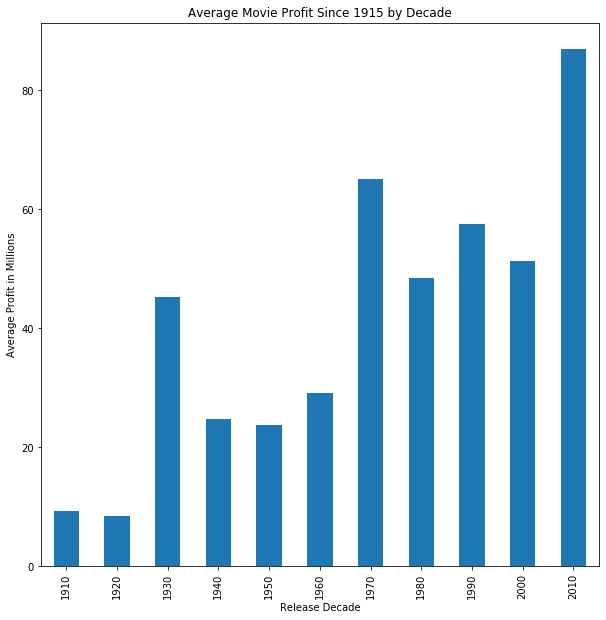

In [15]:
#Plotting average profit over time using plotly

Profit_over_time = (Grossing_movies.groupby(['decade'])['total_profit'].mean())/1000000
Profit_over_time

Profit_over_time.plot(kind='bar',figsize=(10,10))
plt.xlabel('Release Decade')
plt.ylabel('Average Profit in Millions')
plt.title('Average Movie Profit Since 1915 by Decade')
plt.ticklabel_format(style='plain', axis='y') #prevent scientific notation (no longer necessary since we're dividing the mean by millions)

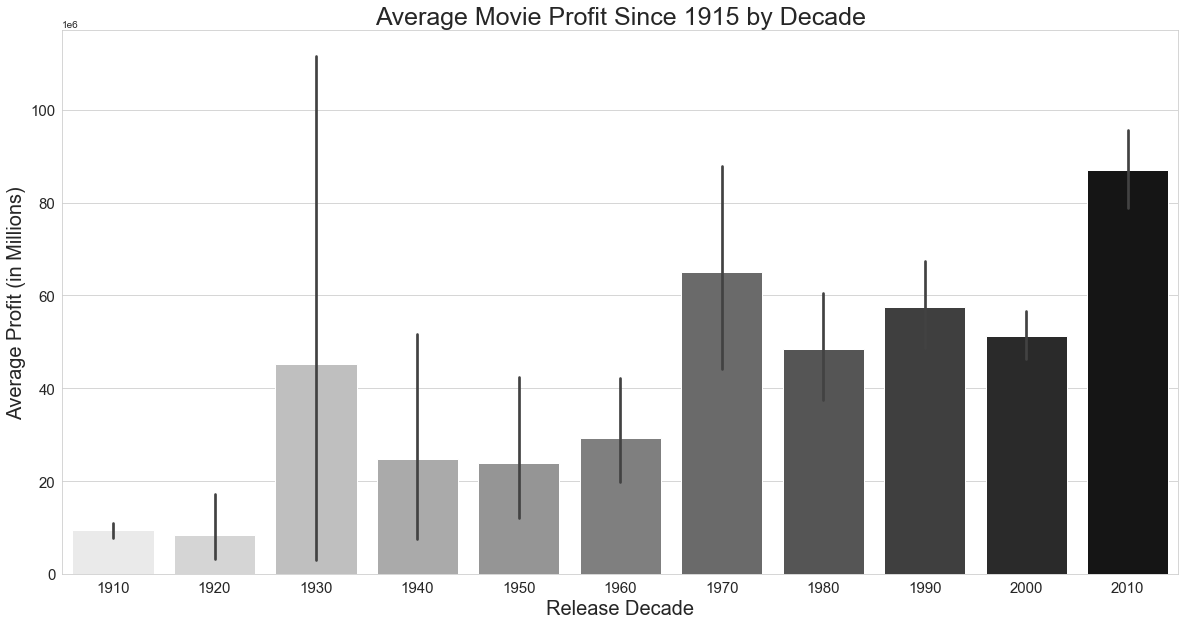

In [16]:
#Plotting average profit over time using seaborn

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=Grossing_movies,x='decade',y='total_profit',palette='gray_r')
sns.set(font="Helvetica")
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Average Movie Profit Since 1915 by Decade',fontsize=25)
plt.xlabel('Release Decade',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='y')
plt.show()



#reverse color map help: https://stackoverflow.com/questions/47461506/how-to-invert-color-of-seaborn-heatmap-colorbar

The movie industry has become increasingly profitable since the 1910s

## Profit in the Last Decade

In [17]:
#Creating new dataframe. Let's look at profit in the last decade so that our analysis is more relevant.

Last_decade_gross = Grossing_movies.loc[Grossing_movies['decade']==2010]
Last_decade_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010


Text(0.5, 1.0, 'Average Movie Profit Since 2010 by Year')

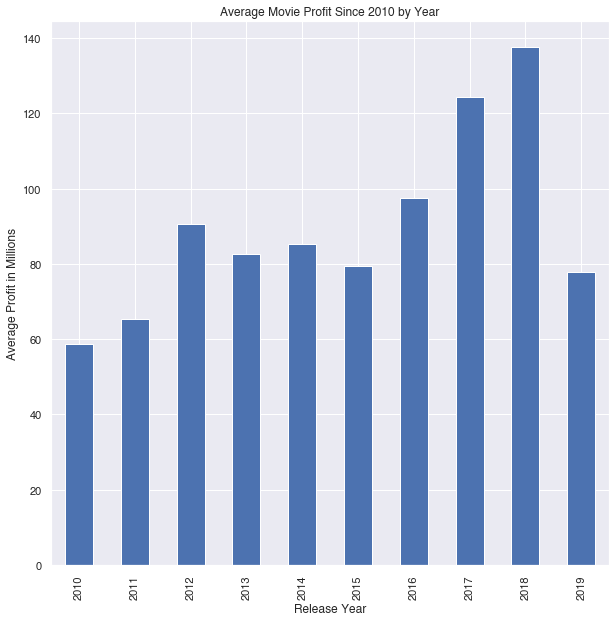

In [18]:
#Plotting average profit over time using plotly

Last_decade_gross_group = (Last_decade_gross.groupby(['release_year'])['total_profit'].mean())/1000000
Last_decade_gross_group.plot(kind='bar',figsize=(10,10))
plt.xlabel('Release Year')
plt.ylabel('Average Profit in Millions')
plt.title('Average Movie Profit Since 2010 by Year')

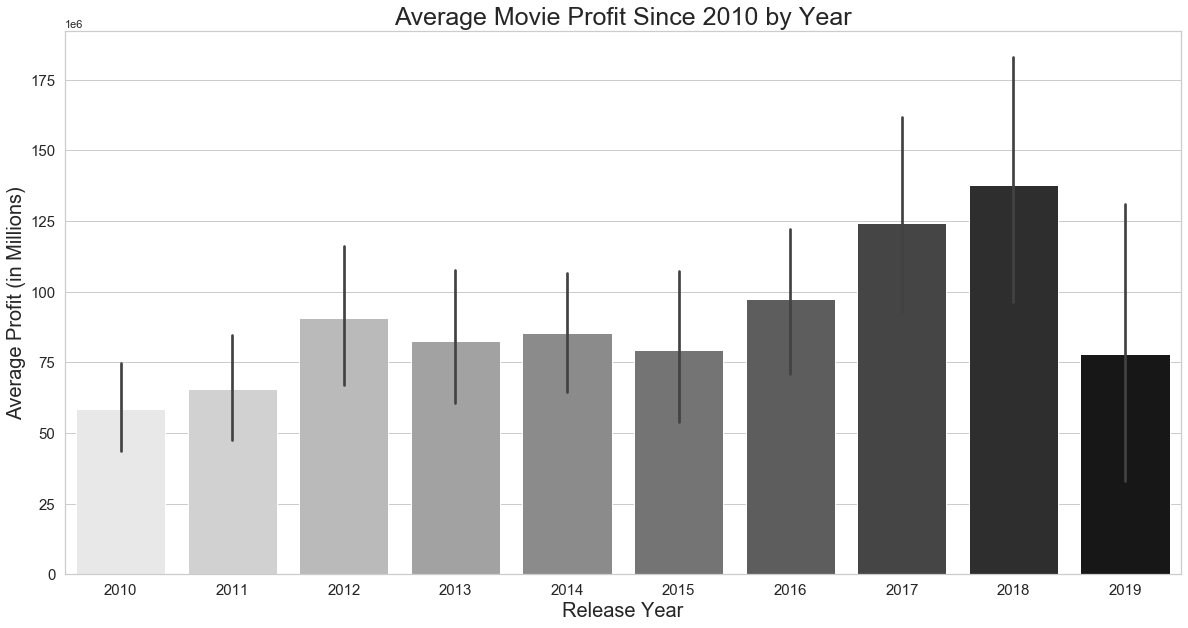

In [19]:
#Plotting average profit over time using seaborn

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=Last_decade_gross,x='release_year',y='total_profit',palette='gray_r')
sns.set(font="Helvetica")
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Average Movie Profit Since 2010 by Year',fontsize=25)
plt.xlabel('Release Year',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='y')
plt.show()

In [20]:
#Investigating why 2019 may have dipped. Sample size for 2019 is smaller than other years.

Last_decade_gross['release_year'].value_counts()

2010    258
2015    242
2011    241
2013    212
2014    207
2012    207
2016    204
2017    162
2018    140
2019     49
Name: release_year, dtype: int64

In [21]:
#Checking if 2019 movies had more movies with profit loss, contributing to the lower average.

(Last_decade_gross['release_year'][Last_decade_gross['total_profit'] < 0].value_counts())/(Last_decade_gross['release_year'].value_counts())

2010    0.341085
2011    0.331950
2012    0.270531
2013    0.292453
2014    0.338164
2015    0.404959
2016    0.279412
2017    0.240741
2018    0.242857
2019    0.306122
Name: release_year, dtype: float64

Potential Reasons for decrease in 2019:

- Limited sample size, especially compared to the other years
- "Cord cutters" are a growing group of consumers, giving rise to more direct to streaming movies and people skipping the box office. This data does not include data around views/profits from these platforms (i.e, Netflix,Hulu,Amazon Prime Video, etc)

# Gathering Additional Information

## TMDB API and TMDB Simple Package import

In [22]:
#Using the movie names provided to search the movie database API
#More info: https://developers.themoviedb.org/3/movies/get-movie-details
#Leveraging the tmdbsimple package to more easily call this information
#More info: https://pypi.org/project/tmdbsimple/

In [23]:
pip install tmdbsimple

Note: you may need to restart the kernel to use updated packages.


In [24]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [25]:
#json file stores API key file

keys = get_keys("/Users/MIRIAM/.secret/tmdb_api.json")

In [26]:
import tmdbsimple as tmdb
tmdb.API_KEY = keys['api_key']

In [27]:
#Decide if we want to run the API calls or just use the saved CSV that they will output.
#Change the below to True if we want to run API calls or False to just leverage the CSV output (Explode_genres.csv). 

run_api_calls = False

#adding if/else to check this value for all subsequent cells in section 4

## Mapping Movie Titles to IDs in TMDB

In [28]:
#Checking for duplicate rows

if run_api_calls == True:
    Last_decade_gross[Last_decade_gross.duplicated()]
else:
    pass

In [29]:
#Checking for duplicate names.  

if run_api_calls == True:
    Last_decade_gross['movie'].value_counts()
else:
    pass

In [30]:
#Duplicate names are differentiated by release year.  

if run_api_calls == True:
    Last_decade_gross[Last_decade_gross['movie']=='The Square']
else:
    pass

In [31]:
if run_api_calls == True:
    Last_decade_gross[Last_decade_gross['movie']=='Robin Hood']
else:
    pass

In [32]:
#Considered using the ID column, but the ID column is not unique.

if run_api_calls == True:
    [Last_decade_gross['id'].value_counts()]
else:
    pass

In [33]:
#Note that we're working with 1922 different movies.

if run_api_calls == True:
    Last_decade_gross
else:
    pass

In [34]:
# Create unique identifier using movie and release year

if run_api_calls == True:
    Last_decade_gross['unique'] = Last_decade_gross["release_year"].astype(str) + "," + Last_decade_gross["movie"]

    Last_decade_gross
else:
    pass

In [35]:
#Creating a list of unique titles and release years to loop through. 

if run_api_calls == True:
    movie_unique = list(Last_decade_gross['unique'])
else:
    pass

In [36]:
#Checking how we can separate years and titles for each item in list

if run_api_calls == True:
    movie_unique[0][0:4]
else:
    pass

In [37]:
if run_api_calls == True:
    movie_unique[0][5:]
else:
    pass

In [38]:
#Looping through our list of unique movie names to search tmdb to find the movie IDs
#Creating an empty list to fill the ids with. If error, we'll fill the ID with 'Missing' for now.
#Creating an empty list to separate the titles missing ids
#Taking the first result from the search as it is most likely the most relevant(best match first). 
##No exact match option available.
#Including a print items so that we can track progress of this loop.


if run_api_calls == True:
    
    search = tmdb.Search()
    tmdb_ids = []
    errors = []
    items = 0


    for movie in movie_unique:
        items += 1
        print(items)
        yr = (movie[0:4])
        name = (movie[5:])
        try:
            response = search.movie(query = name,year=yr)
            tmdb_ids.append(search.results[0]['id'])
        except: 
            tmdb_ids.append('Missing')
            errors.append(movie)
        if items == len(movie_unique):
            break
    else: 
        pass
        


In [39]:
#Checking that our list of ids matches the number of movies from Last_decade_gross. 

if run_api_calls == True:
    len(tmdb_ids)
else: 
    pass

In [40]:
#Adding TMDB IDs to our df. 
#Filtering to see 'Missing rows'

if run_api_calls == True:

    Last_decade_gross['tmdb_ids'] = tmdb_ids
    Last_decade_gross[Last_decade_gross['tmdb_ids'] == 'Missing']
else:
    pass

In [41]:
#How many errors were there?

if run_api_calls == True:
    len(errors)
else:
    pass

In [42]:
#Many errors being caused due to special characters

if run_api_calls == True:
    errors
else:
    pass

In [43]:
#Manually determined the special characters and the replacements needed. Input them in a list.

if run_api_calls == True:
    replacements = [('Ã©','é'),
                ("\x80\x80\x99","'"),
                ("â\x80\x99","'"),
                 ('Ãª','ê'),
                 ('â\x80¦','...'),
                 ('â\x80\x99'','''),
                 ('Ã¡','á'),
                 ('Ã¨','è'),
                 ('Ã','à'),
                 ('Âº','º'),
                 ('\\',"'"),
                 ('à¸','ø'),
                 ('à§','ç'),
                 ('Ep.','Episode'),
                 ('à³','ó'),
                 ('à¹','ù'),
                 ('2Â½','2½'),
                 ('à¤','ä'),
                 ('à¬','ì'),
                 ('à»','û'),
                 ('à\\x','í'),
                 ('à«','ë'),
                 ('â\x80\x93','-'),
                 ('à¥','å'),
                 ('Part II','Part 2') ]
else:
    pass

In [44]:
#Create a formula to clean the movie titles in list of errors. 

if run_api_calls == True:
    def clean_movie(data):
            for a in replacements:
                data = data.replace(a[0], a[1])
            return data
else:
    pass

In [45]:
#Test formula

if run_api_calls == True:
    print(errors[2][5:])
    print(clean_movie(errors[2][5:]))
else:
    pass

In [46]:
#Creating an empty list to add the clean names to.
#Creating an empty list to add the original names to (to use later to map our replacements).

if run_api_calls == True:
    errors_replacements = []
    errors_replacements_unique = []

    for movie in errors:
        errors_replacements.append(clean_movie(movie[5:]))
        errors_replacements_unique.append(movie)
else:
    pass

In [47]:
if run_api_calls == True:
    errors_replacements
else:
    pass

In [48]:
#Creating a dataframe to map the original and fixed names. 

if run_api_calls == True:
    errors_dict = {'unique':errors_replacements_unique,'fixed':errors_replacements}
    errors_df = pd.DataFrame(errors_dict)
    errors_df
else:
    pass

In [49]:
#Looping through the corrected names to try to find the IDs again

if run_api_calls == True:
    search = tmdb.Search()
    fixed_ids = []
    errors_after_name_update = []
    items = 0


    for movie in errors_df['fixed']:
        items += 1
        print(items)
        try:
            response = search.movie(query = movie)
            fixed_ids.append(search.results[0]['id'])
        except: 
            fixed_ids.append('Missing')
            errors_after_name_update.append(movie)
        if items == len(errors_df['fixed']):
            break
else:
    pass

In [50]:
if run_api_calls == True:
    len(fixed_ids) == len(errors_df['fixed'])
else:
    pass

In [51]:
#Adding the ids to the dataframe

if run_api_calls == True:
    errors_df['fixed_ids'] = fixed_ids
    errors_df
else:
    pass

In [52]:
#Reduced Missing values to 13. Dropping these (<1% of Last_decade_gross)

if run_api_calls == True:
    errors_df[errors_df['fixed_ids']=='Missing'].shape
else:
    pass

In [53]:
if run_api_calls == True:
    errors_df[errors_df['fixed_ids']=='Missing']
else:
    pass

In [54]:
#Creatings new df where the missing data is not included

if run_api_calls == True:
    no_missing = errors_df[errors_df['fixed_ids']!='Missing']
    no_missing = no_missing.reset_index(drop=True)
    no_missing.head()
else:
    pass

In [55]:
#Replace items from errors into Last Decade 

In [56]:
#Dictionary with IDs

if run_api_calls == True:
    found_tmdb = dict(zip(errors_df['unique'],errors_df['fixed_ids']))
    len(found_tmdb)
    found_tmdb
else:
    pass

In [57]:
#Checking that the number of 'Missing' rows matches the length of errors. 

if run_api_calls == True:
    len(Last_decade_gross['tmdb_ids'][Last_decade_gross["tmdb_ids"]=='Missing'])
else:
    pass

In [58]:
if run_api_calls == True:
    Last_decade_gross[Last_decade_gross["tmdb_ids"]=='Missing']
else:
    pass

In [59]:
#Where Last_decade_gross tmdb_ids is missing, map our found tmdb ids based based on our unique name columns

if run_api_calls == True:
    Last_decade_gross["tmdb_ids"][Last_decade_gross["tmdb_ids"]=='Missing'] =  Last_decade_gross["unique"].map(found_tmdb)
else:
    pass

In [60]:
if run_api_calls == True:
    Last_decade_gross['movie'][Last_decade_gross["tmdb_ids"]=='Missing']
else:
    pass

In [61]:
#Dropping 13 missing

if run_api_calls == True:
    Last_decade_gross = Last_decade_gross[Last_decade_gross["tmdb_ids"]!='Missing']
else:
    pass

In [62]:
#Checking for null values

if run_api_calls == True:
    Last_decade_gross.isna().sum()
else:
    pass

In [63]:
if run_api_calls == True:
    Last_decade_gross.head()
else:
    pass

In [64]:
#Dropping id and unique columns. No longer needed. 

if run_api_calls == True:
    Last_decade_gross.drop(['id','unique'],axis=1,inplace=True)
else:
    pass

In [65]:
#Reset index for clarity

if run_api_calls == True:
    Last_decade_gross.reset_index(drop=True)
    Last_decade_gross
else:
    pass

## Using IDs to find Genres and Ratings

In [66]:
#Tests to determine example outputs

In [67]:
#Genres. Response will return multiple genres + IDs.

if run_api_calls == True:
    movie = tmdb.Movies(1865)
    response = movie.info()
    response = response['genres']
    response
else:
    pass

In [68]:
#Ratings. Need to filter to US ratings only. Will print multiple ratings. Occasionally duplicates.

if run_api_calls == True:
    response = movie.releases()
    movie.countries
    for c in movie.countries:
        if c['iso_3166_1'] == 'US':
            print((c['certification']))
else:
    pass

In [69]:
#Looping through our tmdb_ids to search tmdb to find the movie IDs
#Creating empty lists to fill the genres and ratings with.
#Taking all genres.
#Taking all of the results fromr ratings, but ensuring that we're only adding unqiue values per movie.
##No exact match option available.
#Including a print items so that we can track progress of this loop.

if run_api_calls == True:
    count = 0

    genre_names = []
    ratings_list = []

    for m in Last_decade_gross['tmdb_ids']:

        count += 1
        print(count)

        #genres
        movie_genre = []
        movie = tmdb.Movies(m)
        response = movie.info()
        response = response['genres']
        for g in response:
            movie_genre.append(g['name'])
        genre_names.append(movie_genre)

        #ratings
        grouped_ratings = []
        response = movie.releases()
        movie.countries
        for c in movie.countries:
            if c['iso_3166_1'] == 'US':
                grouped_ratings.append((c['certification']))
        unique = sorted(set(grouped_ratings))
        unique = [x for x in unique if len(x.strip()) > 0]
        if len(unique) == 0:
            unique.append('Not Rated')
        ratings_list.append(unique)
else:
    pass

In [70]:
#Making sure each list has 1909 items

if run_api_calls == True:
    print(len(genre_names))
else:
    pass

In [71]:
if run_api_calls == True:
    print(len(ratings_list))
else:
    pass

In [72]:
#Adding values to dataframes as new columns

if run_api_calls == True:
    Last_decade_gross['Genres'] = genre_names
    Last_decade_gross['Ratings'] = ratings_list
else:
    pass

In [73]:
if run_api_calls == True:
    Last_decade_gross.head()
else:
    pass

## Cleaning Ratings Data

In [74]:
#Checking what unique values we have

if run_api_calls == True:
    unique_ratings = [] 
    for x in Last_decade_gross.Ratings:
        if x not in unique_ratings: 
                unique_ratings.append(x)
    unique_ratings
else:
    pass

In [75]:
#Consolidating all ratings to one value

In [76]:
#Converting values from lists to strings so that we can easily work with them
if run_api_calls == True:
    ratings_list
    new_ratings_list = []
    for rating in ratings_list:
        new_ratings_list.append(str(rating))
else:
    pass

In [77]:
#View new format

if run_api_calls == True:
    unique_ratings = [] 
    for x in new_ratings_list:
        if x not in unique_ratings: 
                unique_ratings.append(x)
    unique_ratings
else:
    pass

In [78]:
#Replace ratings with string version of the list

if run_api_calls == True:
    Last_decade_gross['Ratings'] = new_ratings_list
    Last_decade_gross.head()
else:
    pass

In [79]:
#Replacing all ratings with more than one value that includes NR

if run_api_calls == True:
    list(Last_decade_gross['Ratings'][Last_decade_gross['Ratings'].str.contains("\['NR',")].unique())
else:
    pass

In [80]:
#Replacing all entries with two ratings where one of them is NR with just the original rating

if run_api_calls == True:
    Last_decade_gross['Ratings'][Last_decade_gross['Ratings'] == "['NR', 'PG-13']"] = "['PG-13']"
    Last_decade_gross['Ratings'][Last_decade_gross['Ratings'] == "['NR', 'R']"] = "['R']"
else:
    pass

In [81]:
#Now to isolate all other entries with 2 ratings

if run_api_calls == True:
    list(Last_decade_gross['Ratings'].unique())
else:
    pass

In [82]:
if run_api_calls == True:
    Last_decade_gross[Last_decade_gross['Ratings'].str.contains(",")]
else:
    pass

In [83]:
#Manually re-assinging this based on tmdb default on movie page

#https://www.themoviedb.org/movie/209112-batman-v-superman-dawn-of-justice => PG-13
#https://www.themoviedb.org/movie/383498-deadpool-2?language=en-US => R

if run_api_calls == True:
    Last_decade_gross['Ratings'][Last_decade_gross['tmdb_ids']==209112] = "['PG-13']"
    Last_decade_gross['Ratings'][Last_decade_gross['tmdb_ids']==383498] = "['R']"
else:
    pass

In [84]:
#Finally checking unique values again

if run_api_calls == True:
    list(Last_decade_gross['Ratings'].unique())
else:
    pass

In [85]:
#Spot checked a few of these at themoviedb.org and there is not a US rating. Updating to be NR

if run_api_calls == True:
    Last_decade_gross[Last_decade_gross['Ratings']== "['Not Rated']"]
else:
    pass

In [86]:
if run_api_calls == True:
    Last_decade_gross['Ratings'][Last_decade_gross['Ratings'] == "['Not Rated']"] = "['NR']"
else:
    pass

In [87]:
if run_api_calls == True:
    list(Last_decade_gross['Ratings'].unique())
else:
    pass

## Cleaning Genres Data

In [88]:
#Previously used the one hot method. See v3 notebook for that work. Movd forward with explode method. 
#Creating new df (copy) to preserve clean ratings

if run_api_calls == True:
    Explode_genres = Last_decade_gross.copy()
else:
    pass

In [89]:
#Checking format of genre items

if run_api_calls == True:
    (list(Explode_genres.Genres))[0]
else:
    pass

In [90]:
## Convert genre items to string and replacing special characters

if run_api_calls == True:
    Explode_genres.Genres = Explode_genres.Genres.astype('str').str.replace(']','').str.replace('[','').str.replace("'",'').str.split(",")
    Explode_genres.head()
else:
    pass

In [91]:
if run_api_calls == True:
    Explode_genres = Explode_genres.explode('Genres')
    Explode_genres
else:
    pass

In [92]:
#Checking for rows without genres 

if run_api_calls == True:
    Explode_genres[Explode_genres['Genres']=='']
else:
    pass

In [93]:
#Dropping these rows 

if run_api_calls == True:
    Explode_genres = Explode_genres[Explode_genres['Genres']!='']
else:
    pass

In [94]:
#Checking unique values

if run_api_calls == True:
    list(Explode_genres.Genres.unique())
else:
    pass

In [95]:
#cleaning up

if run_api_calls == True:
    Explode_genres.Genres = Explode_genres.Genres.str.replace(' ','')
else:
    pass

In [98]:
if run_api_calls == True:
    Explode_genres.head()
else:
    pass

## Export to CSV

In [99]:
#Exporting to CSV in order to avoid having to loop through API calls every time we open this notebook


if run_api_calls == True:
    Explode_genres.to_csv("Explode_genres.csv",index=False)
else:
    pass

In [100]:
#Re-naming the dataframe we create earlier as the same exact CSV

Explode_genres = pd.read_csv("Explode_genres.csv")

In [101]:
Explode_genres.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Adventure,['PG-13']
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Action,['PG-13']
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Fantasy,['PG-13']
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,ScienceFiction,['PG-13']
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,Action,['PG-13']


# Question 2: Which Genres are most profitable?

In [102]:
#Average profit per movie for all genres

genre_avg_profit = pd.DataFrame((Explode_genres.groupby('Genres')['total_profit'].mean()/1000000).round(2)).sort_values('total_profit',ascending=False)
genre_avg_profit.reset_index(inplace=True)


genre_avg_profit.head(10)


,Genres,total_profit
0,Adventure,244.32
1,Animation,213.39
2,Fantasy,207.62
3,ScienceFiction,200.70
4,Family,178.76
5,Action,165.28
6,Comedy,82.45
7,Thriller,64.46
8,Music,55.44
9,Mystery,55.23


In [103]:
#Creating a df for top ten most profitable genres

top_ten_df = Explode_genres[(Explode_genres['Genres'] != 'Romance') & 
               (Explode_genres['Genres'] != 'Horror') & 
               (Explode_genres['Genres'] != 'Crime') &
               (Explode_genres['Genres'] != 'Western') &
              (Explode_genres['Genres'] != 'War') &
              (Explode_genres['Genres'] != 'Drama') &
              (Explode_genres['Genres'] != 'History') &
              (Explode_genres['Genres'] != 'Documentary')]

top_ten_df.sort_values('total_profit',ascending = False,inplace=True)
top_ten_df.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
18,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,299536,ScienceFiction,['PG-13']
17,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,299536,Action,['PG-13']
16,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,299536,Adventure,['PG-13']
12,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,Action,['PG-13']
15,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,Fantasy,['PG-13']


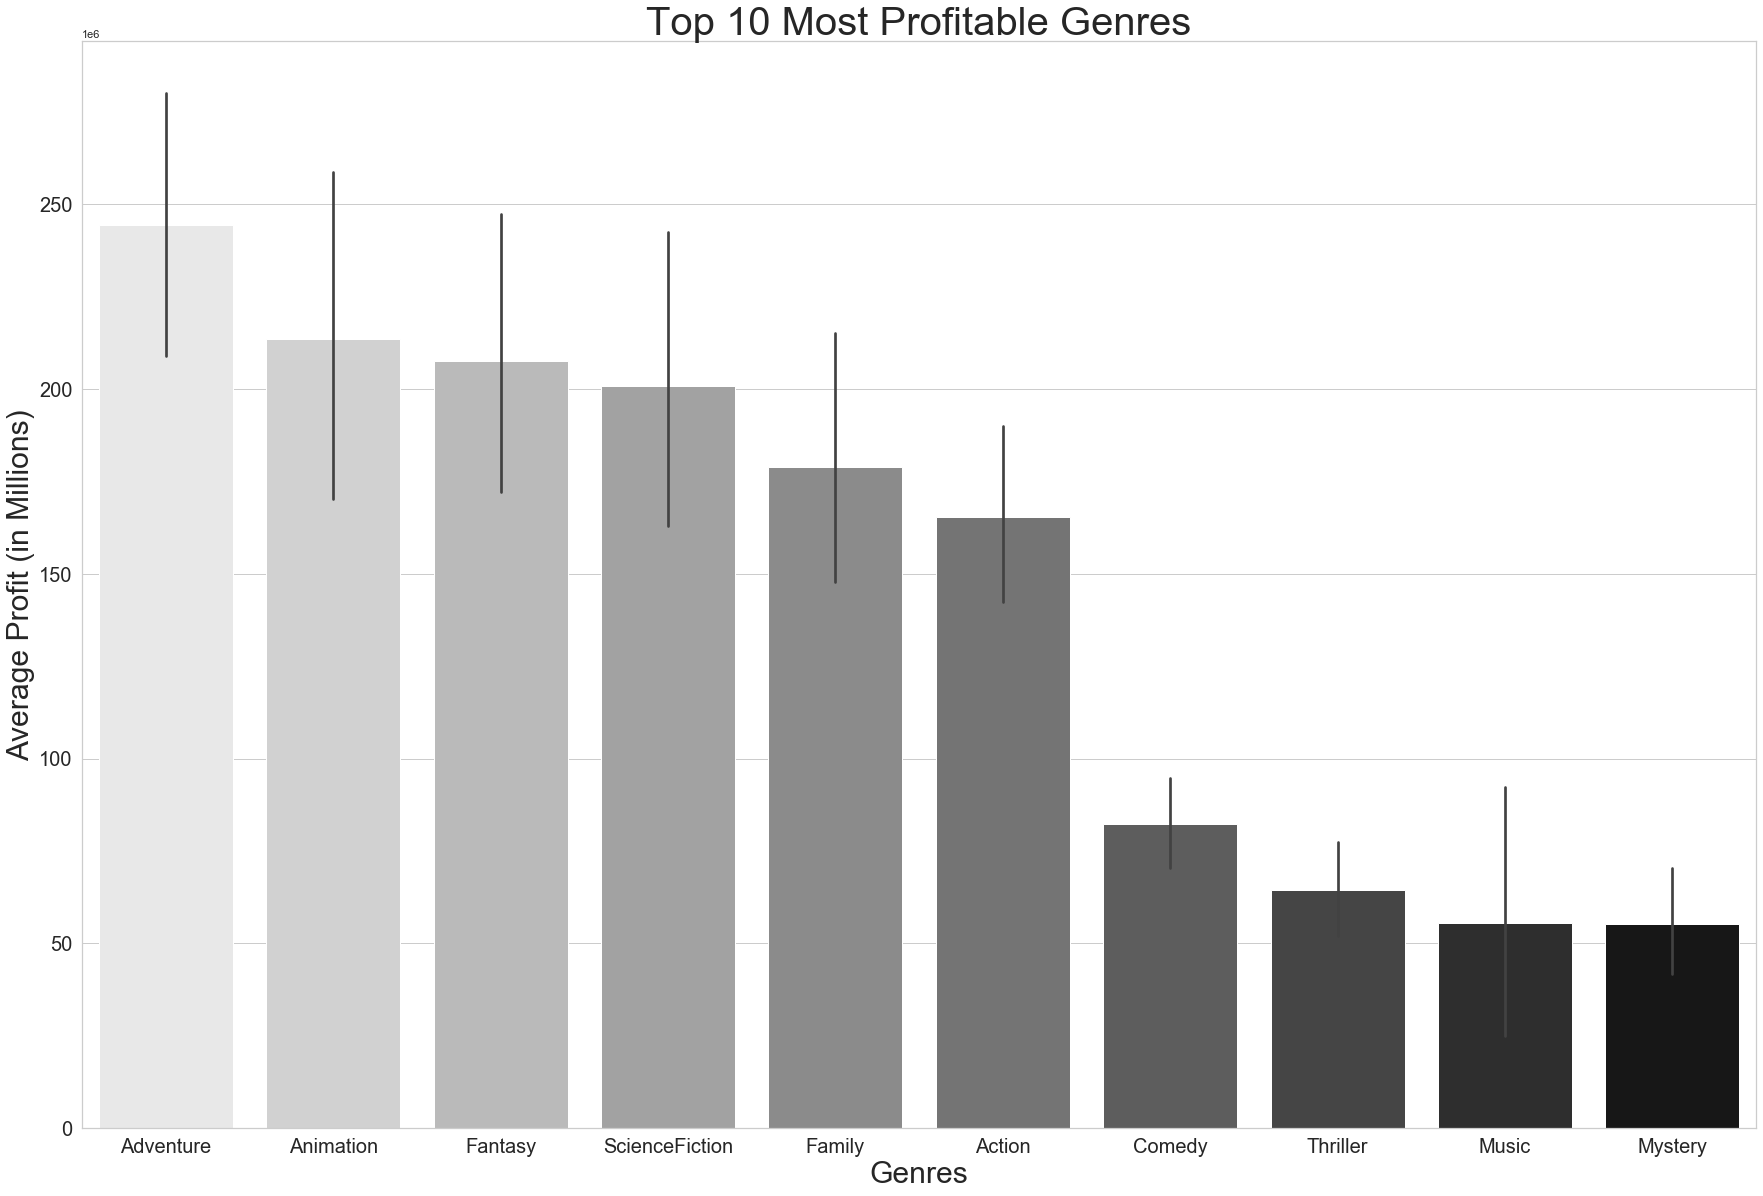

In [104]:
#Plotting average profit for the top 10 most profitable genres. 
#Ordering by the mean

sns.set_style("whitegrid")


f, ax = plt.subplots(figsize=(30, 20))
sns.set(font="Helvetica")
sns.barplot(x="Genres", y="total_profit", data=top_ten_df,palette='gray_r',order=list(genre_avg_profit.head(10)['Genres']));
plt.ylabel('Average Profit (in Millions)',fontsize=30)
plt.title('Top 10 Most Profitable Genres',fontsize=40)
plt.xlabel('Genres',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='y')
plt.show()

In [105]:
#plotting distirbution of top 3 genres

top_three_df = Explode_genres[(Explode_genres['Genres'] == 'Adventure') | 
               (Explode_genres['Genres'] == 'Animation') | 
               (Explode_genres['Genres'] == 'Fantasy')]

top_three_df.sort_values('total_profit',ascending = False,inplace=True)
top_three_df.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
16,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,299536,Adventure,['PG-13']
13,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,Adventure,['PG-13']
15,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,Fantasy,['PG-13']
81,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,2010,135397,Adventure,['PG-13']
64,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,2010,24428,Adventure,['PG-13']


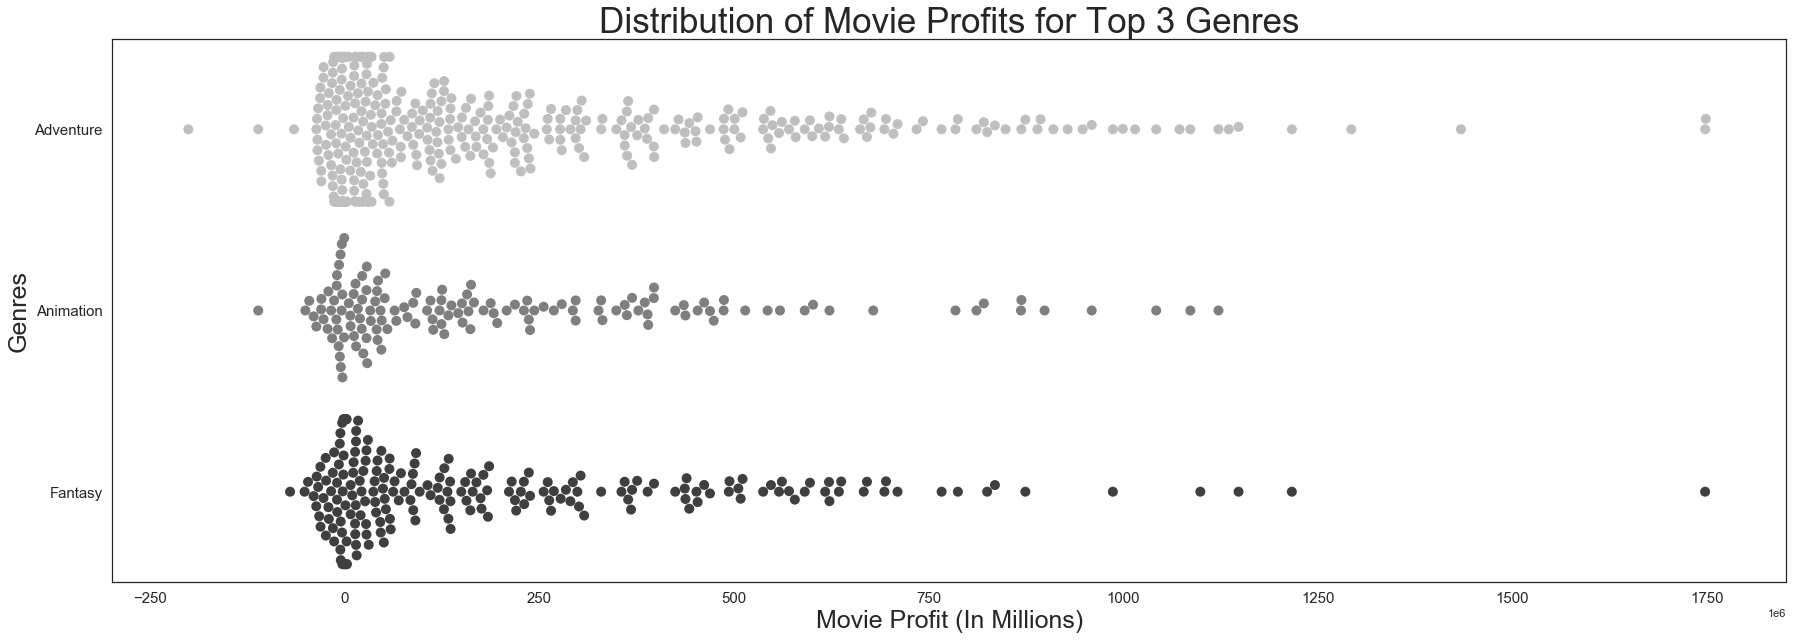

In [106]:
#plotting distribution of top 3 genres

sns.set_style("white")
f, ax = plt.subplots(figsize=(30, 10))
sns.swarmplot(y='Genres',x='total_profit',data=top_three_df,orient='h',palette="gray_r",order=['Adventure','Animation','Fantasy'],size=10)
sns.set(font="Helvetica")
plt.ylabel('Genres',fontsize=25)
plt.title('Distribution of Movie Profits for Top 3 Genres',fontsize=35)
plt.xlabel('Movie Profit (In Millions)',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='x')
plt.show()

# Question 3: Which Ratings are most profitable?

In [107]:
Explode_genres.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Adventure,['PG-13']
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Action,['PG-13']
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,Fantasy,['PG-13']
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,ScienceFiction,['PG-13']
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,Action,['PG-13']


In [108]:
#Grouped ratings

ratings_avg_profit = pd.DataFrame((Explode_genres.groupby('Ratings')['total_profit'].mean()/1000000).round(2)).sort_values('total_profit',ascending=False)
ratings_avg_profit.reset_index(inplace=True)


ratings_avg_profit.head(10)

,Ratings,total_profit
0,['PG'],184.83
1,['PG-13'],156.85
2,['G'],145.60
3,['R'],44.24
4,['NC-17'],16.41
5,['NR'],1.49


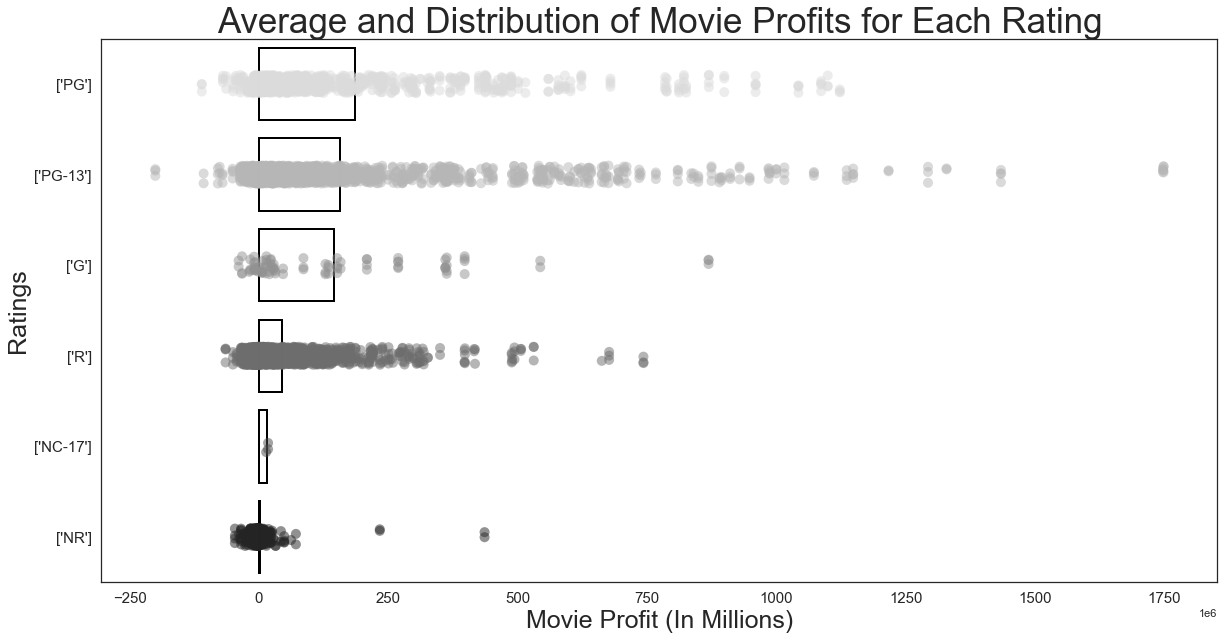

In [109]:
#plotting distribution of ratings

order = ["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"]

sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 10))
mean = sns.barplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',ci=None,fill=False,order=order,zorder=0,edgecolor='black',linewidth=2)
distro = sns.stripplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',palette = 'gray_r',size=10,alpha=0.5,order=order,zorder=1)

sns.set(font="Helvetica")
plt.ylabel('Ratings',fontsize=25)
plt.title('Average and Distribution of Movie Profits for Each Rating',fontsize=35)
plt.xlabel('Movie Profit (In Millions)',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='x')
plt.show()

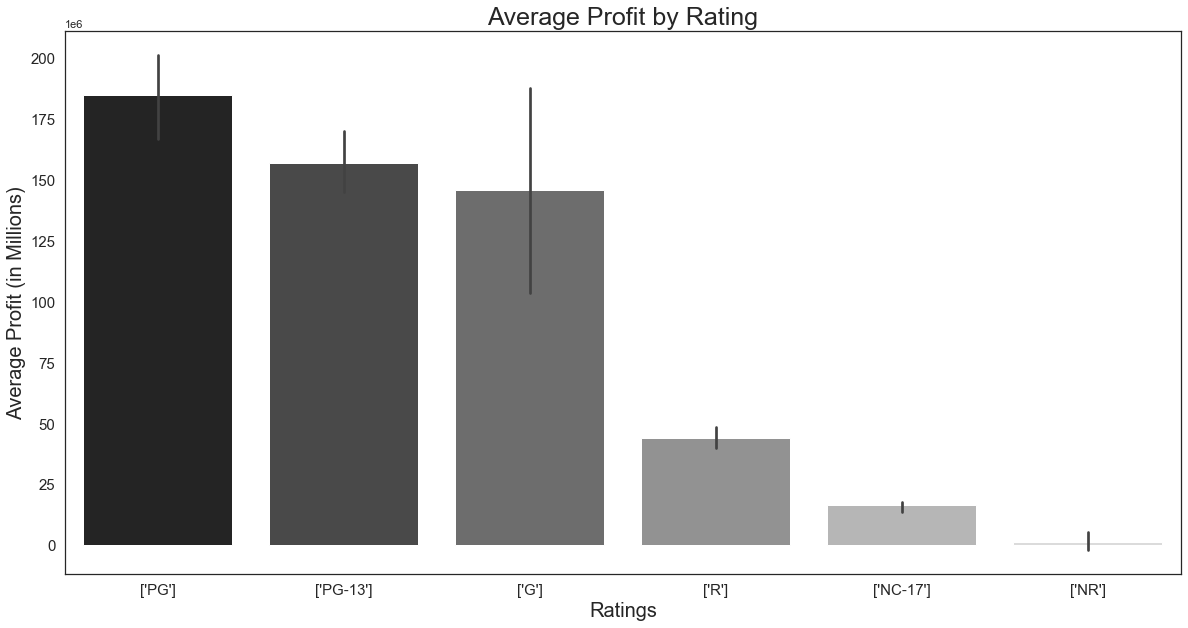

In [110]:
#plotting average of ratings

sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="Ratings", y="total_profit",data=Explode_genres,palette='gray',order=list(ratings_avg_profit['Ratings']));
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Average Profit by Rating',fontsize=25)
plt.xlabel('Ratings',fontsize=20)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='y')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

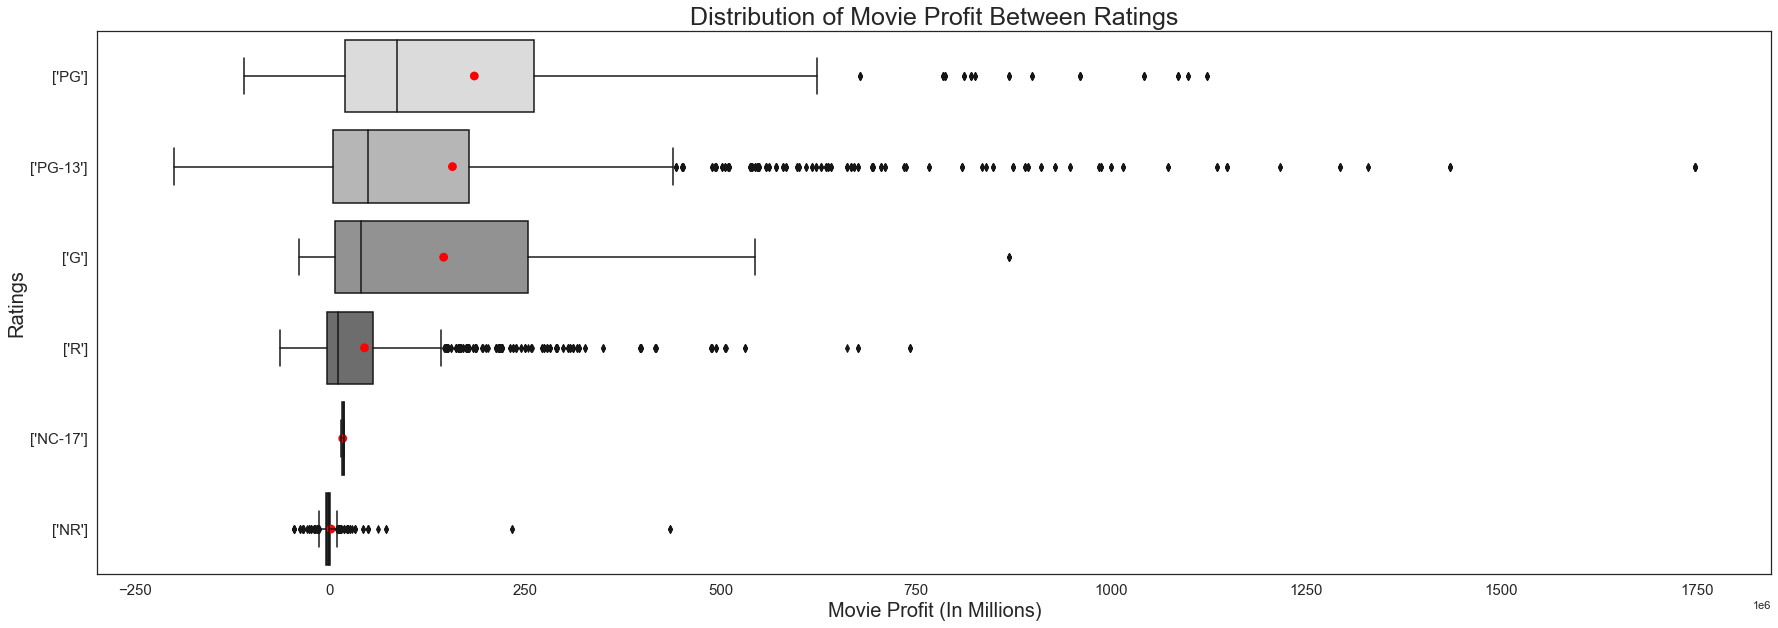

In [111]:
#plotting distribution of ratings. Boxplot is more detailed than we need.

sns.set_style("white")
f, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',palette="gray_r",order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"])
sns.pointplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',linestyles = 'None', scale=1, ci=None,color='red',markers = 'o',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],label='mean')
sns.set(font="Helvetica")
plt.ylabel('Ratings',fontsize=20)
plt.title('Distribution of Movie Profit Between Ratings',fontsize=25)
plt.xlabel('Movie Profit (In Millions)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='x')
plt.show()


# Question 4: Which Ratings and Genres Combinations are Most Profitable?

In [112]:
#Creating a df for each of the top genres

Adventure_df = (Explode_genres[Explode_genres['Genres']=='Adventure'])
Animation_df = (Explode_genres[Explode_genres['Genres']=='Animation'])
Fantasy_df = (Explode_genres[Explode_genres['Genres']=='Fantasy'])

In [113]:
#Grouped ratings

pd.DataFrame((Explode_genres.groupby(['Genres','Ratings'])['total_profit'].mean()/1000000).round(2)).sort_values('total_profit',ascending=False)


,,total_profit
Genres,Ratings,
Adventure,['PG-13'],347.70
Fantasy,['PG-13'],294.66
ScienceFiction,['PG-13'],294.63
Action,['PG-13'],251.44
Animation,['PG'],237.83
...,...,...
History,['NR'],-8.88
ScienceFiction,['NR'],-9.70
War,['NR'],-11.62


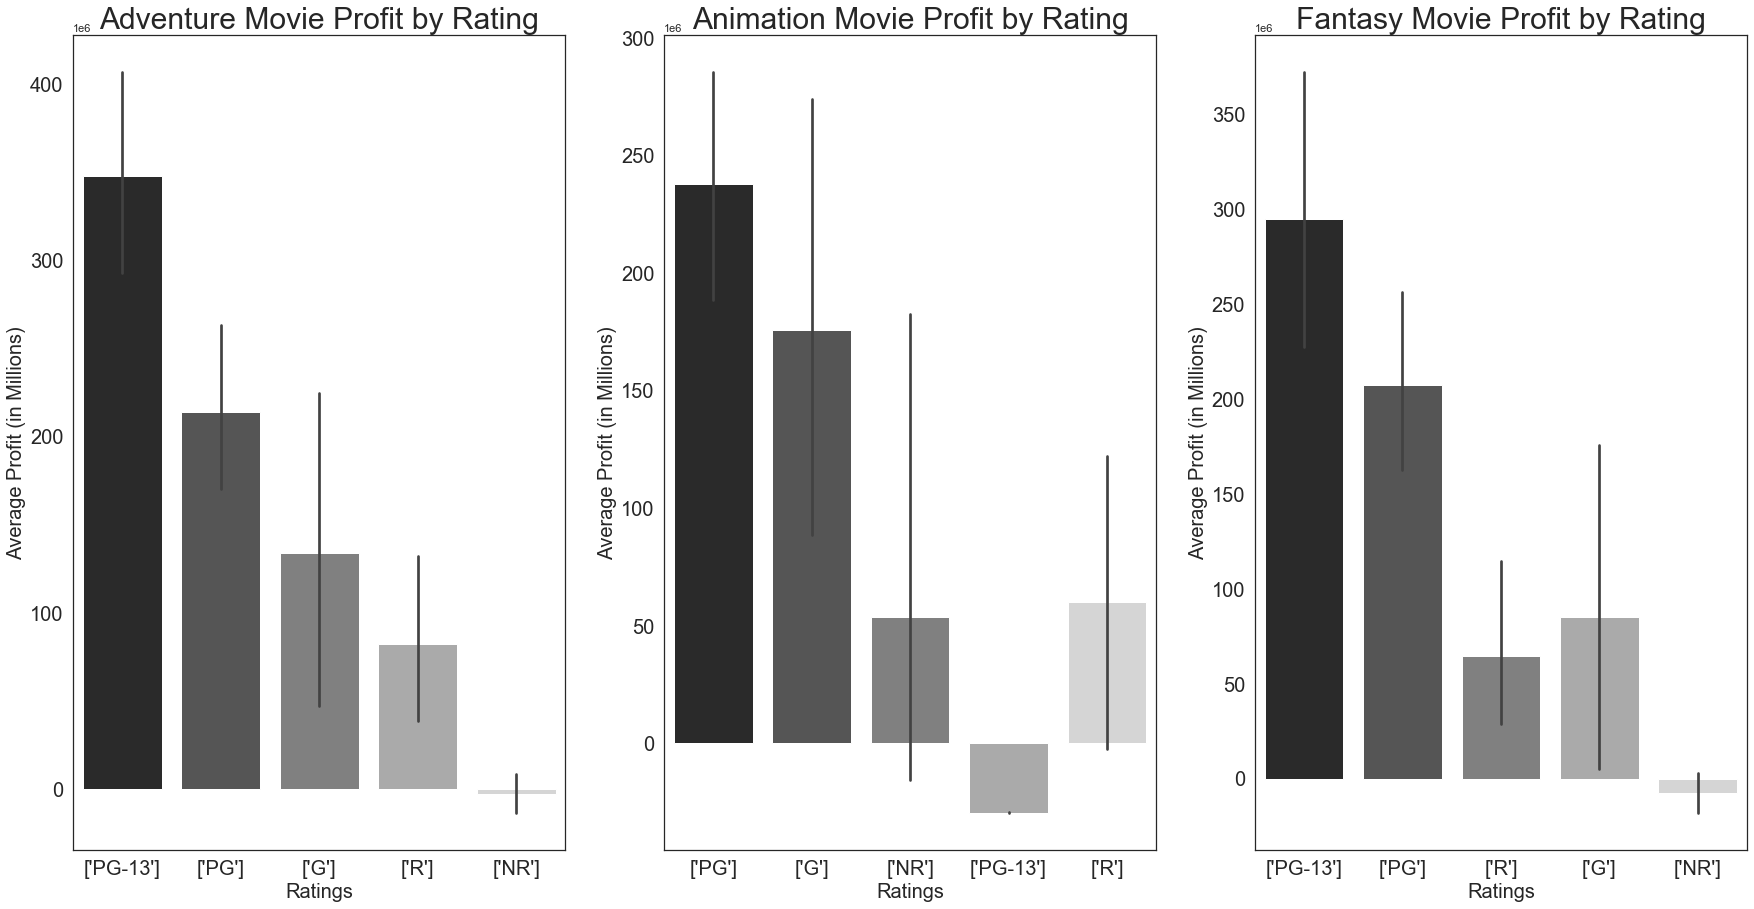

In [114]:
#Plotting Average Movie Profits by Rating

sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(30, 15))

#Adventure subplot

sns.barplot(x='Ratings', y='total_profit',data=Adventure_df,palette='gray',ax=ax1)
ax1.set_ylabel('Average Profit (in Millions)',fontsize=20)
ax1.set_xlabel('Ratings',fontsize=20)
ax1.set_title('Adventure Movie Profit by Rating',fontsize=30)
ax1.tick_params(labelsize=20)
ax1.ticklabel_format(style='sci',scilimits = (6,6), axis='y')

# #Animation subplot

sns.barplot(x='Ratings', y='total_profit',data=Animation_df,palette='gray',ax=ax2)
ax2.set_ylabel('Average Profit (in Millions)',fontsize=20)
ax2.set_xlabel('Ratings',fontsize=20)
ax2.set_title('Animation Movie Profit by Rating',fontsize=30)
ax2.tick_params(labelsize=20)
ax2.ticklabel_format(style='sci',scilimits = (6,6), axis='y')

# #Fantasy subplot

sns.barplot(x='Ratings', y='total_profit',data=Fantasy_df,palette='gray',ax=ax3)
ax3.set_ylabel('Average Profit (in Millions)',fontsize=20)
ax3.set_xlabel('Ratings',fontsize=20)
ax3.set_title('Fantasy Movie Profit by Rating',fontsize=30)
ax3.tick_params(labelsize=20)
ax3.ticklabel_format(style='sci',scilimits = (6,6), axis='y')


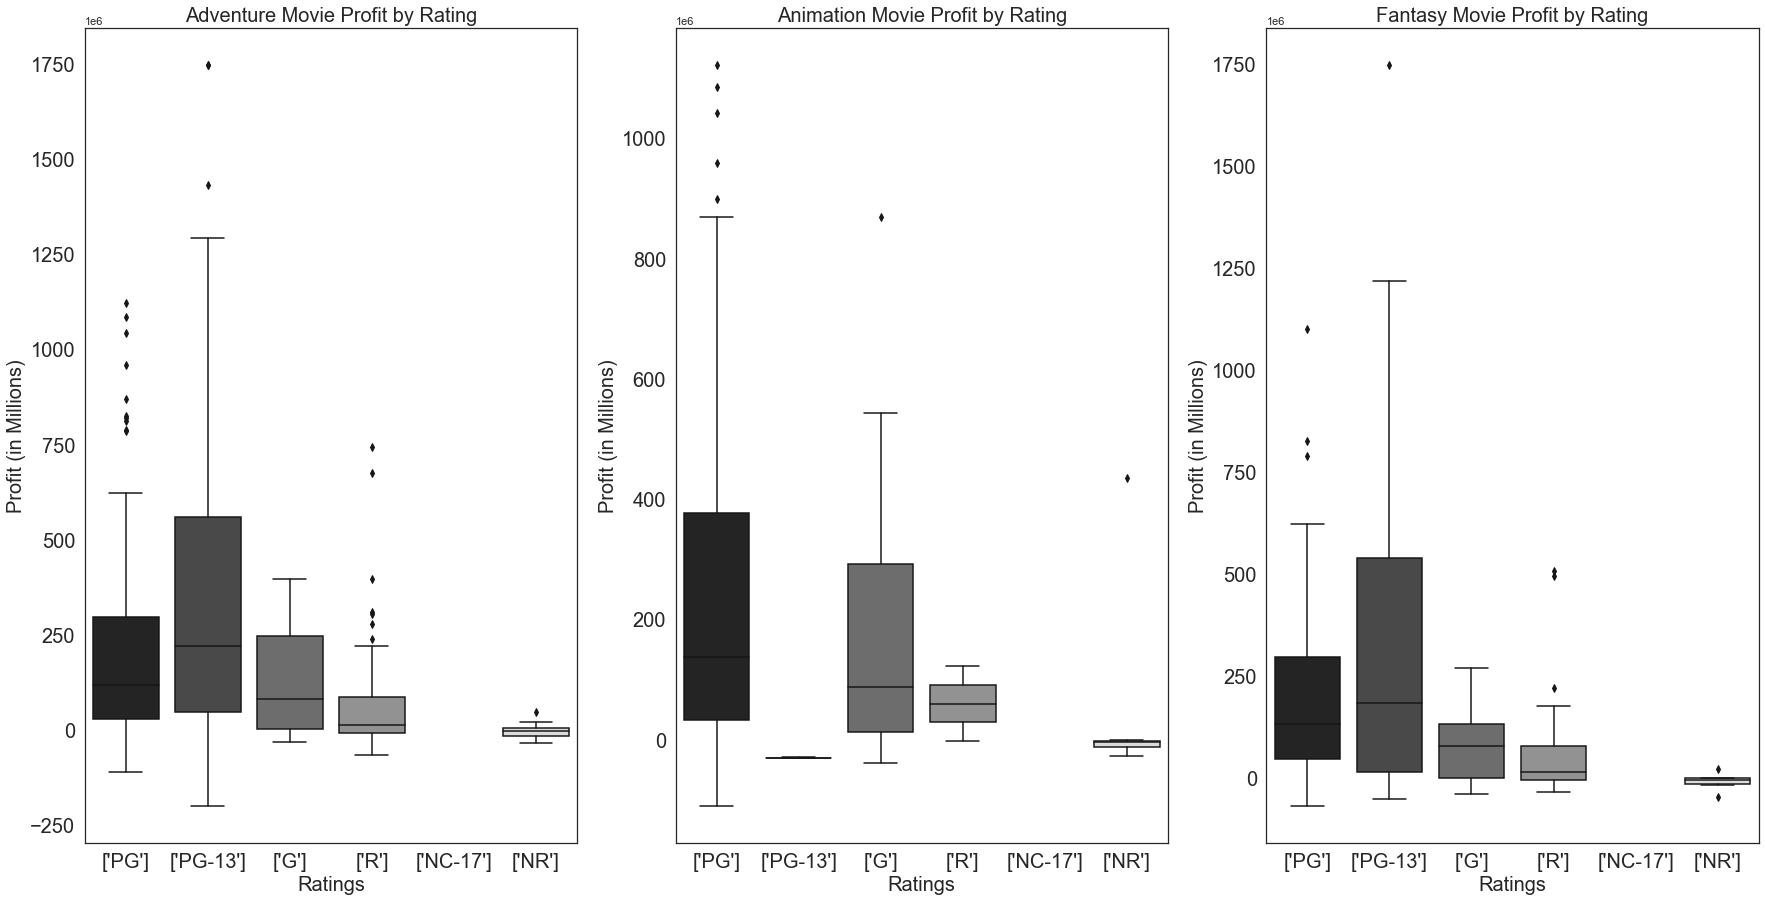

In [115]:
#Plotting boxplot to see distribution

sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(30, 15))


#Adventure subplot

sns.boxplot(x='Ratings', y='total_profit',data=Adventure_df,palette='gray',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],ax=ax1)
ax1.set_ylabel('Profit (in Millions)',fontsize=20)
ax1.set_xlabel('Ratings',fontsize=20)
ax1.set_title('Adventure Movie Profit by Rating',fontsize=20)
ax1.tick_params(labelsize=20)
ax1.ticklabel_format(style='sci',scilimits = (6,6), axis='y')

#Animation subplot

sns.boxplot(x='Ratings', y='total_profit',data=Animation_df,palette='gray',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],ax=ax2)
ax2.set_ylabel('Profit (in Millions)',fontsize=20)
ax2.set_xlabel('Ratings',fontsize=20)
ax2.set_title('Animation Movie Profit by Rating',fontsize=20)
ax2.tick_params(labelsize=20)
ax2.ticklabel_format(style='sci',scilimits = (6,6), axis='y')

#Fantasy subplot

sns.boxplot(x='Ratings', y='total_profit',data=Fantasy_df,palette='gray',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],ax=ax3)
ax3.set_ylabel('Profit (in Millions)',fontsize=20)
ax3.set_xlabel('Ratings',fontsize=20)
ax3.set_title('Fantasy Movie Profit by Rating',fontsize=20)
ax3.tick_params(labelsize=20)
ax3.ticklabel_format(style='sci',scilimits = (6,6), axis='y')


# Recommendations

- Pursue production of Adventure, Animation and/or Fantasy films for greatest profits
- Keep ratings to PG-13 and below in order to maintain as large of a potential audience as possible
- Highest potential ratings/genre combinations:
 - Adventure & PG-13
 - Animation & PG
 - Fantasy & PG-13

